In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [2]:
data_test=pd.read_csv("test_sample.csv")

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\1008564930.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test=pd.read_csv("test_sample.csv")


In [3]:
data_test

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1.245540e+12,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1.400160e+12,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1.279900e+12,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,6.012955e+10,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,5.153960e+11,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609409,1.288490e+11,97,77545,34905,2024-06-09T11:55:20.000Z,1,1,InitialAccess,T1566.002,TruePositive,...,NaN,5,66,Inbound,NaN,NoThreatsFound,242,1445,10630,Private
609410,1.090920e+12,235,214,2236,2024-06-10T11:59:06.000Z,35,23,InitialAccess,T1566,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
609411,1.529010e+12,145,163578,218475,2024-06-13T07:52:29.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,Malicious,242,1445,10630,Public
609412,3.865470e+11,35,210,858203,2024-06-10T21:49:48.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [4]:
data_test.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns',None)
data_test.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1.245540e+12,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [6]:
data_test.shape

(609414, 46)

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609414 entries, 0 to 609413
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  609414 non-null  float64
 1   OrgId               609414 non-null  int64  
 2   IncidentId          609414 non-null  int64  
 3   AlertId             609414 non-null  int64  
 4   Timestamp           609414 non-null  object 
 5   DetectorId          609414 non-null  int64  
 6   AlertTitle          609414 non-null  int64  
 7   Category            609414 non-null  object 
 8   MitreTechniques     270798 non-null  object 
 9   IncidentGrade       609414 non-null  object 
 10  ActionGrouped       309 non-null     object 
 11  ActionGranular      309 non-null     object 
 12  EntityType          609414 non-null  object 
 13  EvidenceRole        609414 non-null  object 
 14  DeviceId            609414 non-null  int64  
 15  Sha256              609414 non-nul

HANDLING DATA

In [8]:
threshold=len(data_test)*0.5
data_test=data_test.dropna(thresh=threshold,axis=1)

In [9]:
data_test.shape

(609414, 36)

In [10]:
data_test.duplicated().sum()

np.int64(6015)

In [11]:
data_test.drop_duplicates(inplace=True)

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\10369537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop_duplicates(inplace=True)


In [12]:
data_test

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1.245540e+12,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
1,1.400160e+12,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
2,1.279900e+12,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public
3,6.012955e+10,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4,5.153960e+11,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609409,1.288490e+11,97,77545,34905,2024-06-09T11:55:20.000Z,1,1,InitialAccess,TruePositive,MailMessage,Related,98799,138268,360606,160396,441377,21705,425863,453297,153085,52925,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
609410,1.090920e+12,235,214,2236,2024-06-10T11:59:06.000Z,35,23,InitialAccess,FalsePositive,User,Impacted,98799,138268,360606,160396,248143,319527,313927,305106,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
609411,1.529010e+12,145,163578,218475,2024-06-13T07:52:29.000Z,1,1,InitialAccess,BenignPositive,MailCluster,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
609412,3.865470e+11,35,210,858203,2024-06-10T21:49:48.000Z,0,0,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603399 entries, 0 to 609413
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  603399 non-null  float64
 1   OrgId               603399 non-null  int64  
 2   IncidentId          603399 non-null  int64  
 3   AlertId             603399 non-null  int64  
 4   Timestamp           603399 non-null  object 
 5   DetectorId          603399 non-null  int64  
 6   AlertTitle          603399 non-null  int64  
 7   Category            603399 non-null  object 
 8   IncidentGrade       603399 non-null  object 
 9   EntityType          603399 non-null  object 
 10  EvidenceRole        603399 non-null  object 
 11  DeviceId            603399 non-null  int64  
 12  Sha256              603399 non-null  int64  
 13  IpAddress           603399 non-null  int64  
 14  Url                 603399 non-null  int64  
 15  AccountSid          603399 non-null  in

In [14]:
data_test["IncidentGrade"].fillna(data_test["IncidentGrade"].mode()[0],inplace=True)

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\3085501160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test["IncidentGrade"].fillna(data_test["IncidentGrade"].mode()[0],inplace=True)
C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\3085501160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["IncidentGrade"].fillna(da

In [15]:
data_test['Timestamp']=pd.to_datetime(data_test['Timestamp'])

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\417562968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Timestamp']=pd.to_datetime(data_test['Timestamp'])


In [16]:
data_test['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [17]:
data_test["Day"]=data_test["Timestamp"].dt.day
data_test["Month"]=data_test["Timestamp"].dt.month
data_test["Year"]=data_test["Timestamp"].dt.year
data_test["Hour"]=data_test["Timestamp"].dt.hour
data_test["Time"]=data_test["Timestamp"].dt.time

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\669573834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Day"]=data_test["Timestamp"].dt.day
C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\669573834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Month"]=data_test["Timestamp"].dt.month
C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\669573834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [18]:
[features for features in data_test.columns if data_test[features].isnull().sum()>0]

[]

In [19]:
data_test.drop("Timestamp",axis=1,inplace=True)  # doprring timestamp column
print(data_test.head())

             Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1.245540e+12    657       11767    87199         524         563   
1  1.400160e+12      3       91158   632273           2           2   
2  1.279900e+12    145       32247   131719        2932       10807   
3  6.012955e+10    222       15294   917686           0           0   
4  5.153960e+11    363        7615     5944          27          18   

            Category   IncidentGrade         EntityType EvidenceRole  \
0    LateralMovement  BenignPositive               User     Impacted   
1  CommandAndControl  BenignPositive            Machine     Impacted   
2    LateralMovement  BenignPositive            Process      Related   
3      InitialAccess   FalsePositive  CloudLogonSession      Related   
4          Discovery  BenignPositive               User     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799  138268     360606  160396        2610        3699   
1      1

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\376134694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop("Timestamp",axis=1,inplace=True)  # doprring timestamp column


In [20]:
pd.set_option("display.max_columns", None)
data_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1.245540e+12,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1.400160e+12,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1.279900e+12,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,6.012955e+10,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,5.153960e+11,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05


In [21]:
data_test['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    254851
TruePositive      217282
FalsePositive     131266
Name: count, dtype: int64

In [22]:
data_test.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

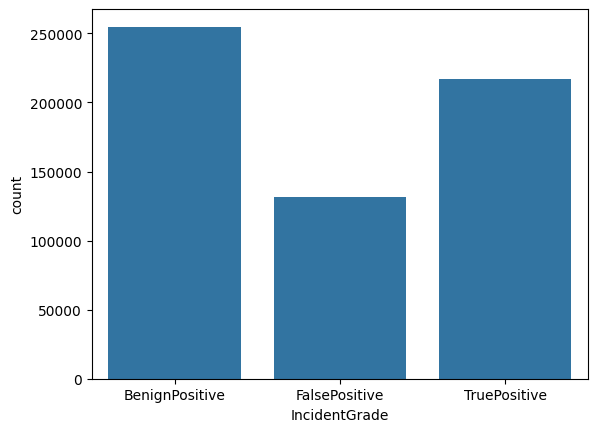

In [23]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data_test)
plt.show()

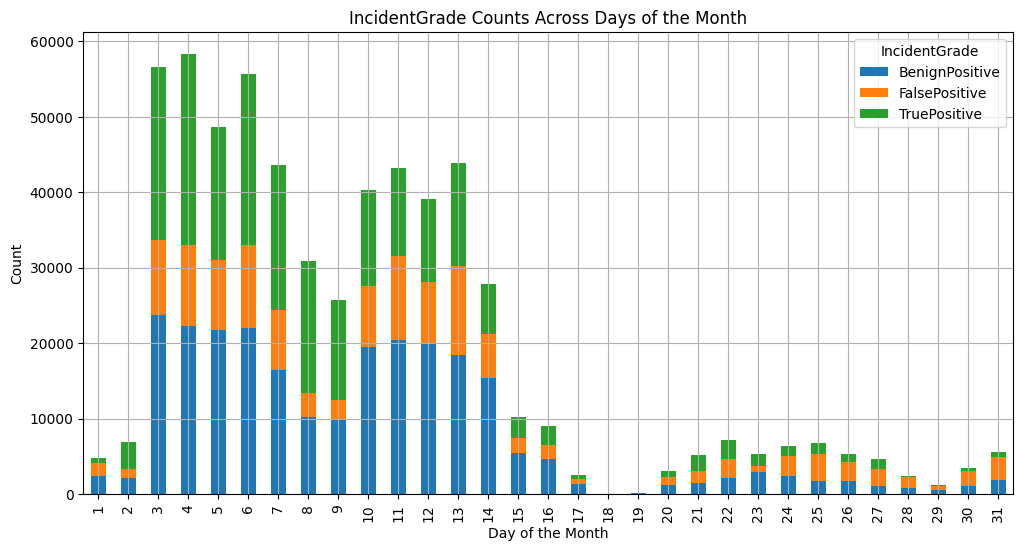

In [24]:
# Aggregate data
day_incident_grade = data_test.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

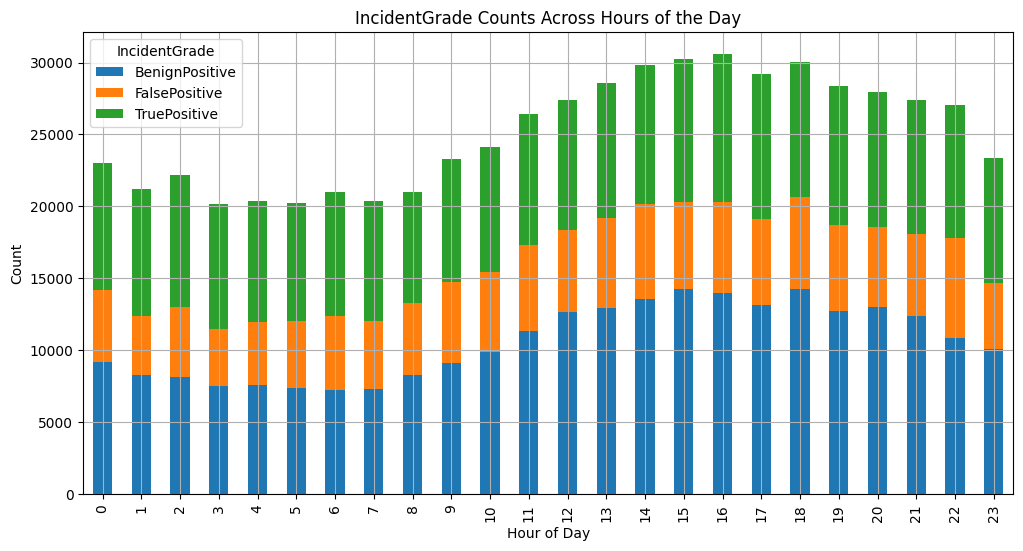

In [25]:
# Aggregate data

hour_incident =data_test.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()

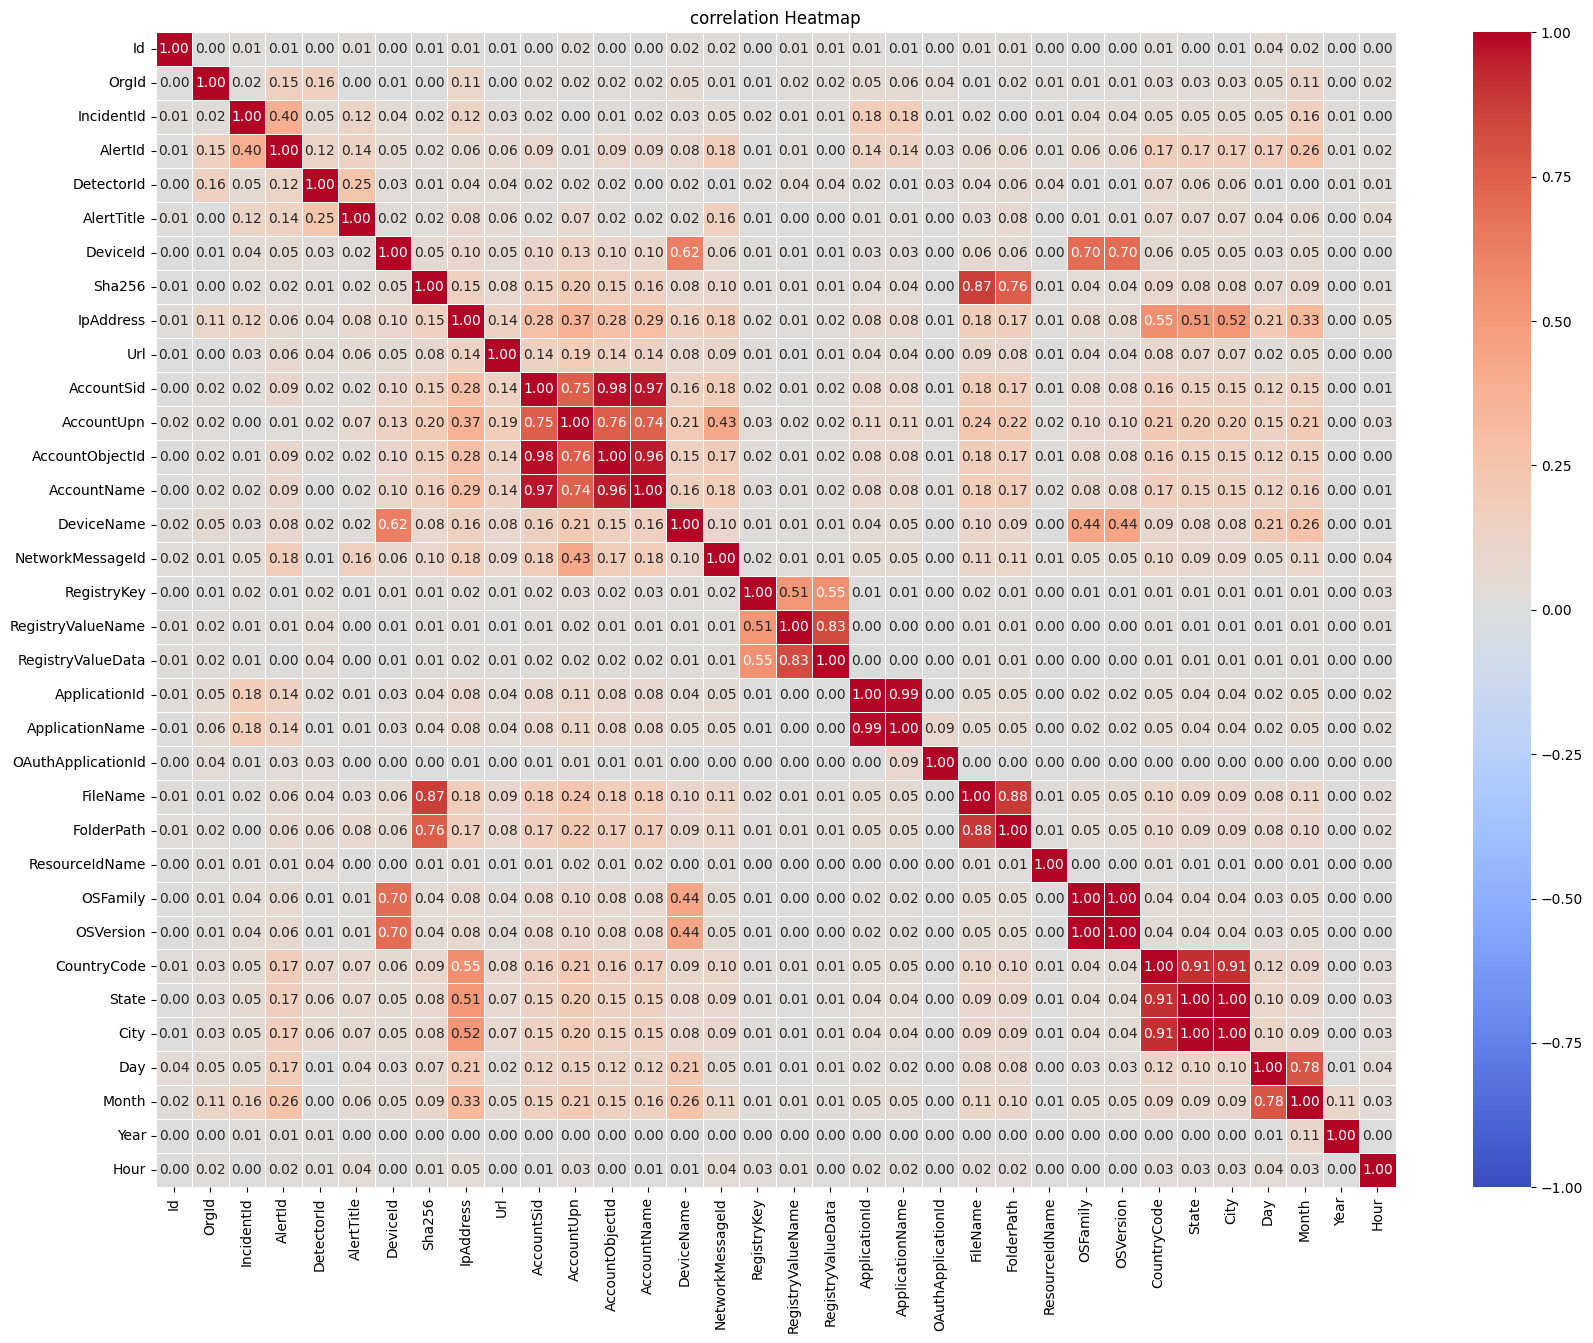

In [26]:
# selecting numerical col
numeric_df=data_test.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [27]:
# dropping 70% above correlated columns
data_test.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\3498427694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)


In [28]:
data_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1.245540e+12,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,Private,4,6,2024,22,22:56:27
1,1.400160e+12,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,Public,3,6,2024,12,12:58:26
2,1.279900e+12,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,Public,8,6,2024,3,03:20:49
3,6.012955e+10,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,Public,12,6,2024,12,12:07:31
4,5.153960e+11,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,Public,6,6,2024,17,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609409,1.288490e+11,97,77545,34905,1,1,InitialAccess,TruePositive,MailMessage,Related,98799,360606,160396,453297,153085,52925,1631,860,2251,881,289573,3586,10630,Private,9,6,2024,11,11:55:20
609410,1.090920e+12,235,214,2236,35,23,InitialAccess,FalsePositive,User,Impacted,98799,360606,160396,305106,153085,529644,1631,860,2251,881,289573,3586,10630,Public,10,6,2024,11,11:59:06
609411,1.529010e+12,145,163578,218475,1,1,InitialAccess,BenignPositive,MailCluster,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,Public,13,6,2024,7,07:52:29
609412,3.865470e+11,35,210,858203,0,0,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,Public,10,6,2024,21,21:49:48


LABEL ENCODING

In [29]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603399 entries, 0 to 609413
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  603399 non-null  float64
 1   OrgId               603399 non-null  int64  
 2   IncidentId          603399 non-null  int64  
 3   AlertId             603399 non-null  int64  
 4   DetectorId          603399 non-null  int64  
 5   AlertTitle          603399 non-null  int64  
 6   Category            603399 non-null  object 
 7   IncidentGrade       603399 non-null  object 
 8   EntityType          603399 non-null  object 
 9   EvidenceRole        603399 non-null  object 
 10  DeviceId            603399 non-null  int64  
 11  IpAddress           603399 non-null  int64  
 12  Url                 603399 non-null  int64  
 13  AccountName         603399 non-null  int64  
 14  DeviceName          603399 non-null  int64  
 15  NetworkMessageId    603399 non-null  in

In [30]:
data_test.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [31]:
Categorical_col=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time']

In [32]:
encoders = {}
for i in Categorical_col:
    le = LabelEncoder()
    data_test[i]=le.fit_transform(data_test[i])
    encoders[i]=le

C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\656446695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[i]=le.fit_transform(data_test[i])
C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\656446695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[i]=le.fit_transform(data_test[i])
C:\Users\jaguh\AppData\Local\Temp\ipykernel_1856\656446695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [33]:
data_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1.245540e+12,657,11767,87199,524,563,11,0,24,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,80302
1,1.400160e+12,3,91158,632273,2,2,1,0,11,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,44971
2,1.279900e+12,145,32247,131719,2932,10807,11,0,19,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,11613
3,6.012955e+10,222,15294,917686,0,0,10,1,6,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,41966
4,5.153960e+11,363,7615,5944,27,18,5,0,24,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,61783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609409,1.288490e+11,97,77545,34905,1,1,10,2,13,1,98799,360606,160396,453297,153085,52925,1631,860,2251,881,289573,3586,10630,0,9,6,2024,11,41255
609410,1.090920e+12,235,214,2236,35,23,10,1,24,0,98799,360606,160396,305106,153085,529644,1631,860,2251,881,289573,3586,10630,1,10,6,2024,11,41473
609411,1.529010e+12,145,163578,218475,1,1,10,0,12,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,13,6,2024,7,27165
609412,3.865470e+11,35,210,858203,0,0,10,2,5,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,10,6,2024,21,76412


In [34]:
data_test.select_dtypes(include=["int32", "int64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'City', 'Usage',
       'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [35]:
data_test1=data_test.copy()

In [36]:
data_test1.to_csv('test_processed.csv',index=False)

In [37]:
data_test1.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1.245540e+12,657,11767,87199,524,563,11,0,24,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,80302
1,1.400160e+12,3,91158,632273,2,2,1,0,11,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,44971
2,1.279900e+12,145,32247,131719,2932,10807,11,0,19,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,11613
3,6.012955e+10,222,15294,917686,0,0,10,1,6,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,41966
4,5.153960e+11,363,7615,5944,27,18,5,0,24,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,61783


In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
os =RandomOverSampler(random_state = 45)

In [40]:
val =data_test1.drop('IncidentGrade', axis =1)

In [41]:
tar = data_test1['IncidentGrade']

In [42]:
tar.value_counts()

IncidentGrade
0    254851
2    217282
1    131266
Name: count, dtype: int64

In [43]:
oval,otar = os.fit_resample(val,tar)

In [44]:
otar.value_counts()

IncidentGrade
0    254851
1    254851
2    254851
Name: count, dtype: int64

FEATURE SELECTION

In [45]:
fs = RandomForestClassifier(n_estimators = 300, random_state =56)

In [46]:
fs.fit(oval,otar)

RandomForestClassifier(n_estimators=300, random_state=56)

In [47]:
pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

['OrgId',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Id',
 'Day',
 'Category',
 'Time',
 'Hour',
 'AccountName',
 'EntityType',
 'IpAddress',
 'DeviceName',
 'FileName']

In [48]:
oval=oval[['OrgId',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Id',
 'Day',
 'Category',
 'Time',
 'Hour',
 'AccountName',
 'EntityType',
 'IpAddress',
 'DeviceName',
 'FileName']]

In [49]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [50]:
traindata.shape

testdata.shape

(152911, 15)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [52]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [53]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [54]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)
dttrain_metrics=metrics(trainlab,dttr_pred)
dttest_metrics=metrics(testlab,dtts_pred)

In [55]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,70.461970,70.306911
1,Precision,76.269871,76.107455
2,Recall,70.460627,70.311720
3,Macro F1,70.704122,70.515852


In [56]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [57]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [58]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,80.884406,80.652144
1,Precision,85.243270,84.979386
2,Recall,80.879839,80.670336
3,Macro F1,81.248524,81.010312


In [59]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)
xgbmodel.fit(traindata,trainlab)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)
xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)

In [61]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,94.516237,93.987352
1,Precision,94.559487,94.028920
2,Recall,94.515349,93.990682
3,Macro F1,94.521176,93.991568
